# Exploratory Data Analysis on Titanic Dataset

## Import required models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [49]:
titanic_df = pd.read_csv('titanic.csv')

## First 5 rows of the Dataset

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Last 5 rows of the Dataset

In [5]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Dataset Information

In [6]:
titanic_df.shape

(891, 12)

In dataset, there are 891 observations and 12 columns.

In [7]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic_df.index

RangeIndex(start=0, stop=891, step=1)

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin and Embarked count is less compare to other columns, reason is the missing data. 

## Prepare data dictonary with counts, missing values and unique values for the columns

In [10]:
data_dict = pd.DataFrame(titanic_df.dtypes)
data_dict = data_dict.rename(columns={0:'DataType'})
data_dict

,DataType
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


### Counts 

In [11]:
# Counts for each variable
data_dict['Count'] = titanic_df.count()
data_dict

,DataType,Count
PassengerId,int64,891
Survived,int64,891
Pclass,int64,891
Name,object,891
Sex,object,891
Age,float64,714
SibSp,int64,891
Parch,int64,891
Ticket,object,891
Fare,float64,891


### Missing Values

In [12]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# identify missing values of the columns
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data_dict['MissingVal'] = titanic_df.isnull().sum()
data_dict

,DataType,Count,MissingVal
PassengerId,int64,891,0
Survived,int64,891,0
Pclass,int64,891,0
Name,object,891,0
Sex,object,891,0
Age,float64,714,177
SibSp,int64,891,0
Parch,int64,891,0
Ticket,object,891,0
Fare,float64,891,0


There are some missing values detected on Age, Cabin, and Embarked columns.

Using heatmap to see where we have missing data

<Axes: >

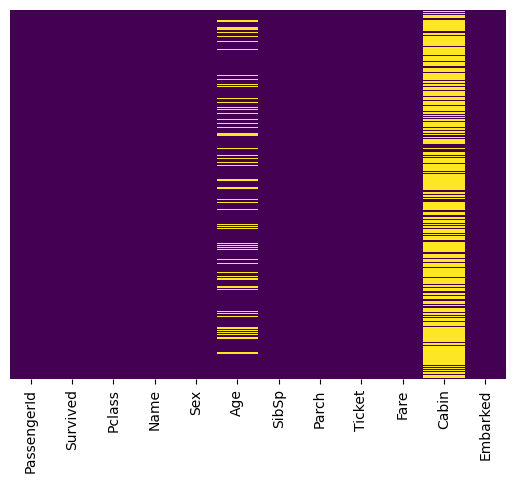

In [16]:
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')

This heatmap helps us to see missing data in highlighted color, the propertion of Age missing values is looks like small but the 'Cabin' column looks having too many missing data.

#### Missing or Zero values for the Age 

In [17]:
(titanic_df.Age == 0).sum() 

0

In [18]:
titanic_df.Age.isnull().sum()

177

#### Missing or Zero values for the Fare 

Fare should have some value greater than 0, since every ticket should be have a value.

In [19]:
(titanic_df.Fare == 0).sum() 

15

Here we can see 15 Zero values for the Fare, so we can consider them are the missing values.

#### Missing or Zero values for the Cabin 

In [20]:
titanic_df.Cabin.isnull().sum() 

687

In [21]:
titanic_df.Cabin.isnull().mean() 

0.7710437710437711

Here we can see 77% of the Cabin values are missing 

#### Missing or Zero values for the Embarked 

In [22]:
titanic_df.Embarked.isnull().sum()

2

In [23]:
titanic_df[titanic_df.Embarked.isnull()].index

Int64Index([61, 829], dtype='int64')

In [24]:
titanic_df.iloc[[61, 829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Here we can see two records have missing values for Embarked

### Unique values

In [25]:
# Get the unique values for each column
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

For object nunique will the number of levels

In [26]:
data_dict['UniqueVal'] = titanic_df.nunique()
data_dict

,DataType,Count,MissingVal,UniqueVal
PassengerId,int64,891,0,891
Survived,int64,891,0,2
Pclass,int64,891,0,3
Name,object,891,0,891
Sex,object,891,0,2
Age,float64,714,177,88
SibSp,int64,891,0,7
Parch,int64,891,0,7
Ticket,object,891,0,681
Fare,float64,891,0,248


In [27]:
print(titanic_df["Pclass"].unique())

[3 1 2]


In [28]:
print(titanic_df["Sex"].unique())

['male' 'female']


In [29]:
print(titanic_df["Embarked"].unique())

['S' 'C' 'Q' nan]


Here we can see "Pclass" column is ordinal category and "Sex" has male and female nominal category and  "Embarked" is also a nomial category similar to "Sex".

## Seggregate the columns based on datatypes

#### get the columns that are object datatype

In [30]:
# get the index of the columns that are object datatype
titanic_df.dtypes[titanic_df.dtypes == 'object'].index 

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [31]:
titanic_df[titanic_df.dtypes[titanic_df.dtypes == 'object'].index].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [32]:
# another way to get it
titanic_df[titanic_df.columns[titanic_df.dtypes == 'object']].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


#### get the columns that are not object datatype

In [33]:
titanic_df[titanic_df.columns[titanic_df.dtypes != 'object']].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## Summary statistics

In [34]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Discriptive statistics of object datatypes

In [35]:
# Get stats for only the columns having type 'object'
titanic_df[titanic_df.columns[titanic_df.dtypes == 'object']].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [36]:
# Get stats for only the columns having type 'object'
titanic_df.describe(include= 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [37]:
titanic_df.astype('object').describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714.0,891,891,891,891.00,204,889
unique,891,2,3,891,2,88.0,7,7,681,248.00,147,3
top,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
freq,1,549,491,1,577,30.0,608,678,7,43.00,4,644


### Discriptive statistics of numerical datatypes

In [38]:
# Get stats for only the columns not type 'object'
titanic_df[titanic_df.columns[titanic_df.dtypes != 'object']].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Discriptive statistics of all datatypes

In [39]:
# Get stats for all the columns
titanic_df.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Feature Engineering: 
Extract new features from the other features

### Get the title of the Name

In [50]:
titanic_df['Title'] = titanic_df['Name'].str.extract('\, ([A-Z][^ ]*\.)',expand=False)
titanic_df[['Name', 'Title']] 

,Name,Title
0,"Braund, Mr. Owen Harris",Mr.
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.
2,"Heikkinen, Miss. Laina",Miss.
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.
4,"Allen, Mr. William Henry",Mr.
...,...,...
886,"Montvila, Rev. Juozas",Rev.
887,"Graham, Miss. Margaret Edith",Miss.
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss.
889,"Behr, Mr. Karl Howell",Mr.


In [51]:
titanic_df['FamilySize']=titanic_df.SibSp+titanic_df.Parch

In [54]:
titanic_df[['FamilySize', 'SibSp', 'Parch']]

,FamilySize,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,3,1,2
889,0,0,0


In [102]:
titanic_df["Alone"] = np.select([titanic_df["FamilySize"] == 0], [1], default=0)

In [104]:
titanic_df[["FamilySize","Alone"]]

,FamilySize,Alone
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
886,0,1
887,0,1
888,3,0
889,0,1


In [57]:
# "Age" is a numerical column but we can group it into bins to get better results thus convert it into ordinal category

# Define custom age groups and corresponding labels
age_bins = [0, 12, 18, 40, 60, 80, 120]  # Define age ranges for each group
age_labels = ['Child', 'Teenager', 'Young Adult', 'Middle-aged', 'Senior', 'Elderly']  # Define labels for each group

# Add a new column 'Age Group' with the corresponding age group labels
titanic_df['Age Group'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels, right=False)

In [58]:
titanic_df[['Age', 'Age Group']]

,Age,Age Group
0,22.0,Young Adult
1,38.0,Young Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult
...,...,...
886,27.0,Young Adult
887,19.0,Young Adult
888,NaN,NaN
889,26.0,Young Adult


## Exploratory Data Analysis

In [61]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'FamilySize',
       'Age Group'],
      dtype='object')

### How many passengers survivied ?

In [66]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

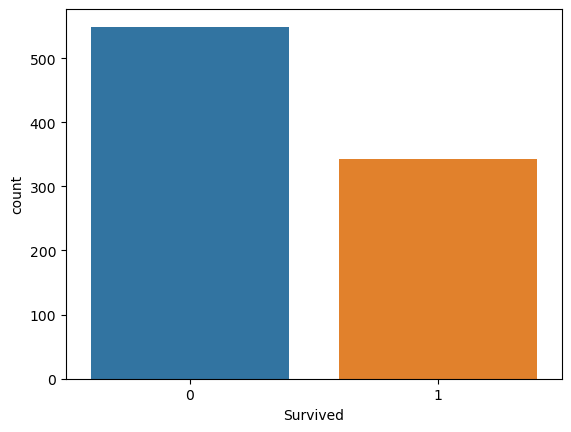

In [62]:
sns.countplot(x='Survived', data= titanic_df)

### Peole who surviived for each sex

In [71]:
titanic_df.groupby('Sex')['Survived'].value_counts().unstack(fill_value=0)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [69]:
titanic_df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

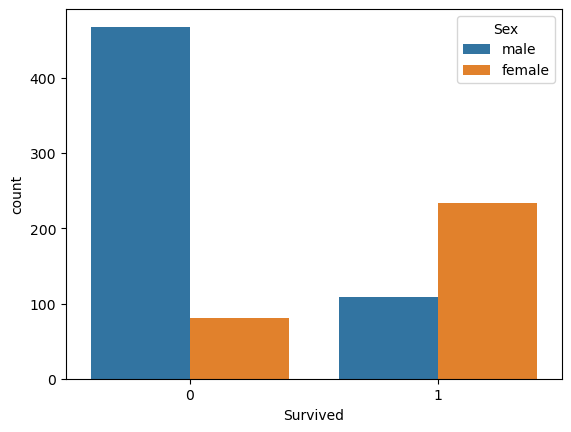

In [72]:
sns.countplot(x='Survived', data= titanic_df, hue='Sex')

### Peole who surviived for each sex, pclass

In [74]:
titanic_df.groupby(['Sex', 'Pclass'])['Survived'].sum()

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

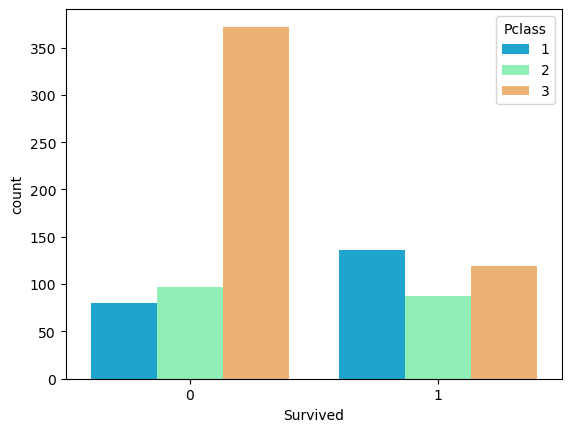

In [77]:
sns.countplot(x='Survived', data= titanic_df, hue='Pclass', palette='rainbow')

### Age Distribution

<Axes: xlabel='Age', ylabel='Count'>

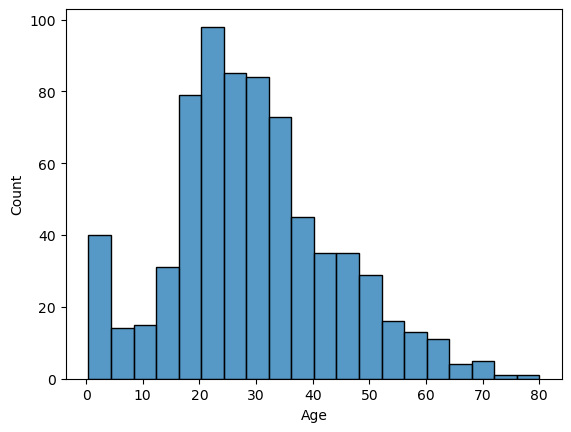

In [78]:
sns.histplot(titanic_df['Age'].dropna(), kde=False)

Passenger's average age is 29.7 years, while the oldest is 80 and the youngest is 5 months.

<Axes: xlabel='SibSp', ylabel='count'>

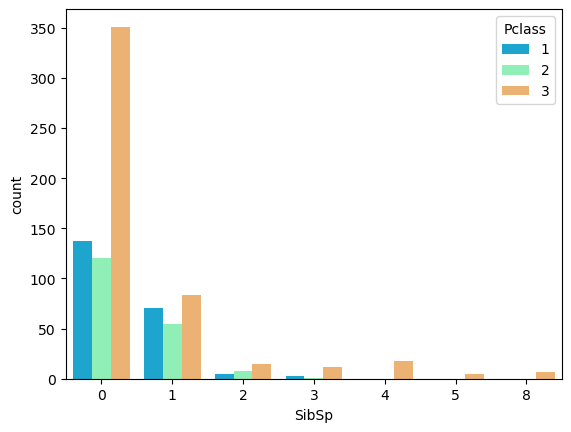

In [79]:
sns.countplot(x='SibSp', data= titanic_df, hue='Pclass', palette='rainbow')

<Axes: >

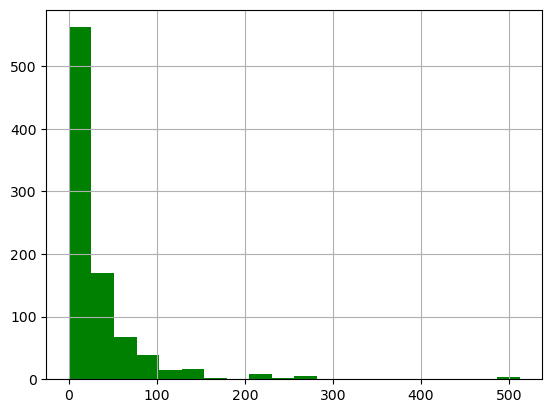

In [17]:
titanic_df['Fare'].hist(bins=20, histtype = 'barstacked', color = 'green') 

The average fare is 32.2 dollars, ranging from 0 to 512 dollars. 

### How many passengers are male an female

In [117]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [81]:
# unique categories in a column
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [82]:
# number of unique categories in a column
titanic_df['Sex'].nunique()

2

In [83]:
# categories wise number of observations in a column
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Majority of passengers were males.

In [84]:
titanic_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

only 38% of the passengers were survived, where as a majority 61% the passenger did not survive the disaster

In [86]:
titanic_df.groupby("Pclass").describe().T

Pclass                      1           2           3
PassengerId count  216.000000  184.000000  491.000000
            mean   461.597222  445.956522  439.154786
            std    246.737616  250.852161  264.441453
            min      2.000000   10.000000    1.000000
            25%    270.750000  234.500000  200.000000
            50%    472.000000  435.500000  432.000000
            75%    670.500000  668.000000  666.500000
            max    890.000000  887.000000  891.000000
Survived    count  216.000000  184.000000  491.000000
            mean     0.629630    0.472826    0.242363
            std      0.484026    0.500623    0.428949
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      1.000000    0.000000    0.000000
            75%      1.000000    1.000000    0.000000
            max      1.000000    1.000000    1.000000
Age         count  186.000000  173.000000  355.000000
            mean    38.233441   29.877630   25.140620
            std     14.802856   14.001077   12.495398
            min      0.920000    0.670000    0.420000
            25%     27.000000   23.000000   18.000000
            50%     37.000000   29.000000   24.000000
            75%     49.000000   36.000000   32.000000
            max     80.000000   70.000000   74.000000
SibSp       count  216.000000  184.000000  491.000000
            mean     0.416667    0.402174    0.615071
            std      0.611898    0.601633    1.374883
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      1.000000    1.000000    1.000000
            max      3.000000    3.000000    8.000000
Parch       count  216.000000  184.000000  491.000000
            mean     0.356481    0.380435    0.393075
            std      0.693997    0.690963    0.888861
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      0.000000    1.000000    0.000000
            max      4.000000    3.000000    6.000000
Fare        count  216.000000  184.000000  491.000000
            mean    84.154687   20.662183   13.675550
            std     78.380373   13.417399   11.778142
            min      0.000000    0.000000    0.000000
            25%     30.923950   13.000000    7.750000
            50%     60.287500   14.250000    8.050000
            75%     93.500000   26.000000   15.500000
            max    512.329200   73.500000   69.550000
FamilySize  count  216.000000  184.000000  491.000000
            mean     0.773148    0.782609    1.008147
            std      1.038524    1.054017    1.953525
            min      0.000000    0.000000    0.000000
            25%      0.000000    0.000000    0.000000
            50%      0.000000    0.000000    0.000000
            75%      1.000000    1.250000    1.000000
            max      5.000000    5.000000   10.000000

### Comparing Fare

In [89]:
print(titanic_df.groupby("Pclass")["Fare"].mean()) # fare for Pclass 1 > Pclass 2 > Pclass3

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [90]:
print(titanic_df.groupby("Survived")["Fare"].mean())

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [91]:
print(titanic_df.groupby("Age")["Fare"].mean())

Age
0.42       8.5167
0.67      14.5000
0.75      19.2583
0.83      23.8750
0.92     151.5500
           ...   
70.00     40.7500
70.50      7.7500
71.00     42.0792
74.00      7.7750
80.00     30.0000
Name: Fare, Length: 88, dtype: float64


In [92]:
print(titanic_df.groupby("Sex")["Fare"].mean())

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


In [93]:
print(titanic_df.groupby("Embarked")["Fare"].mean())

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64


In [95]:
titanic_df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Pclass vs Fare
Upper class means higher room class and higher ticket prices.

In [97]:
#Fare maximum value, minimum value by Pclass
p1 =titanic_df.query('Pclass == 1')
print(f"Max Fare = {max(p1['Fare'])}, Min Fare = {min(p1['Fare'])}")

p2 =titanic_df.query('Pclass == 2')
print(f"Max Fare = {max(p2['Fare'])}, Min Fare = {min(p2['Fare'])}")

p3 =titanic_df.query('Pclass == 3')
print(f"Max Fare = {max(p3['Fare'])}, Min Fare = {min(p3['Fare'])}")

Max Fare = 512.3292, Min Fare = 0.0
Max Fare = 73.5, Min Fare = 0.0
Max Fare = 69.55, Min Fare = 0.0


#### Survival rate by Pclass

In [98]:
titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


It was found that the higher the room rating, the higher the survival rate.
Does the survival rate change depending on the fare even if the room class is the same?

#### Sex survival rate

In [99]:
titanic_df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


It was found that women had a clearly higher survival rate.

### Does the survival rate change depending on the number of family members?

In [106]:
titanic_df[['Alone', 'Survived']].groupby(['Alone']).mean() *100

,Survived
Alone,
0,50.564972
1,30.353818


Survival rate of men with families is low. Male with family = SibSp + Parch >= 1

### How many passenger are less then 5 years old

In [107]:
len(titanic_df[titanic_df['Age'] < 5])

40

### How many passengers are less than and greater than 18 years old

In [109]:
len(titanic_df) - len(titanic_df[titanic_df['Age'] > 18])

316

In [110]:
len(titanic_df[titanic_df['Age'] <= 18])

139

### How many passengers have paid less then avg fare

In [111]:
titanic_df['Fare'].mean()

32.204207968574636

In [113]:
titanic_df[titanic_df['Fare'] < titanic_df['Fare'].mean()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Age Group,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,Young Adult,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,Young Adult,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.,0,NaN,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.,4,Child,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.,0,Young Adult,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.,0,Young Adult,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,3,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.,0,Young Adult,1


### How many passengers paos 0 Fare

In [114]:
len(titanic_df[titanic_df['Fare'] == 0])

15

In [115]:
list(titanic_df[titanic_df['Fare'] == 0].Name)

['Leonard, Mr. Lionel',
 'Harrison, Mr. William',
 'Tornquist, Mr. William Henry',
 'Parkes, Mr. Francis "Frank"',
 'Johnson, Mr. William Cahoone Jr',
 'Cunningham, Mr. Alfred Fleming',
 'Campbell, Mr. William',
 'Frost, Mr. Anthony Wood "Archie"',
 'Johnson, Mr. Alfred',
 'Parr, Mr. William Henry Marsh',
 'Watson, Mr. Ennis Hastings',
 'Knight, Mr. Robert J',
 'Andrews, Mr. Thomas Jr',
 'Fry, Mr. Richard',
 'Reuchlin, Jonkheer. John George']

### How many females who paid more then avrage fare

In [118]:
len(titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Fare'] > titanic_df['Fare'].mean())])

104

### How many male passenger or who paid more then avrage fare

In [119]:
len(titanic_df[(titanic_df['Sex'] == 'male') | (titanic_df['Fare'] > titanic_df['Fare'].mean())])

681

## How many male passenger paid more then avrage fare

In [120]:
len(titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Fare'] > titanic_df['Fare'].mean())])

107

### Who are the passenger paid max fare

In [121]:
titanic_df[titanic_df['Fare'] == max(titanic_df['Fare'])].Name

258                      Ward, Miss. Anna
679    Cardeza, Mr. Thomas Drake Martinez
737                Lesurer, Mr. Gustave J
Name: Name, dtype: object

### How many passengers have parent and childernend greater the 3

In [123]:
len(titanic_df[titanic_df['SibSp'] + titanic_df['Parch'] > 3])

62

### How many passengers who didn't survivied was from class 1

In [126]:
titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 0)].shape[0]

80